# SDO

- http://jsoc.stanford.edu/
- https://www.lmsal.com/sdodocs/doc/dcur/SDOD0060.zip/zip/entry/

## sunpy Fido

In [ ]:
from sunpy.net import Fido, attrs as a
import astropy.units as u

In [ ]:
result = Fido.search(
    a.Time('2020-01-01T00:00:00', '2020-01-01T00:01:00'),
    a.jsoc.Series('aia.lev1_euv_12s'),
    a.jsoc.Segment('image'),
    a.AttrOr([a.Wavelength(wl) for wl in [94, 131, 171, 193, 211, 304, 335]*u.AA]),
    a.Sample(1*u.day),
    a.jsoc.Notify("mgjeon@khu.ac.kr")
)

In [ ]:
result.show()

T_REC,T_OBS,WAVELNTH,DATE,FSN,EXPTIME,QUALITY,ORIGIN,TELESCOP,INSTRUME,DATE__OBS,DATE-OBS,CAMERA,IMG_TYPE,EXPSDEV,INT_TIME,WAVEUNIT,WAVE_STR,FID,QUALLEV0,TOTVALS,DATAVALS,MISSVALS,PERCENTD,DATAMIN,DATAMAX,DATAMEDN,DATAMEAN,DATARMS,DATASKEW,DATAKURT,DATACENT,DATAP01,DATAP10,DATAP25,DATAP75,DATAP90,DATAP95,DATAP98,DATAP99,NSATPIX,OSCNMEAN,OSCNRMS,FLAT_REC,NSPIKES,CTYPE1,CUNIT1,CRVAL1,CDELT1,CRPIX1,CTYPE2,CUNIT2,CRVAL2,CDELT2,CRPIX2,CROTA2,R_SUN,MPO_REC,INST_ROT,IMSCL_MP,X0_MP,Y0_MP,ASD_REC,SAT_Y0,SAT_Z0,SAT_ROT,ACS_MODE,ACS_ECLP,ACS_SUNP,ACS_SAFE,ACS_CGT,ORB_REC,DSUN_REF,DSUN_OBS,RSUN_REF,RSUN_OBS,GAEX_OBS,GAEY_OBS,GAEZ_OBS,HAEX_OBS,HAEY_OBS,HAEZ_OBS,OBS_VR,OBS_VW,OBS_VN,CAR_ROT,CRLT_OBS,CRLN_OBS,HGLN_OBS,HGLT_OBS,ROI_NWIN,CALVER32,ROI_SUM,ROI_NAX1,ROI_NAY1,ROI_LLX1,ROI_LLY1,ROI_NAX2,ROI_NAY2,ROI_LLX2,ROI_LLY2,PIXLUNIT,DN_GAIN,EFF_AREA,EFF_AR_V,TEMPCCD,TEMPGT,TEMPSMIR,TEMPFPAD,ISPSNAME,ISPPKTIM,ISPPKTVN,AIVNMST,AIMGOTS,ASQHDR,ASQTNUM,ASQFSN,AIAHFSN,AECDELAY,AIAECTI,AIASEN,AIFDBID,AIMGOTSS,AIFCPS,AIFTSWTH,AIFRMLID,AIFTSID,AIHISMXB,AIHIS192,AIHIS348,AIHIS604,AIHIS860,AIFWEN,AIMGSHCE,AECTYPE,AECMODE,AISTATE,AIAECENF,AIFILTYP,AIMSHOBC,AIMSHOBE,AIMSHOTC,AIMSHOTE,AIMSHCBC,AIMSHCBE,AIMSHCTC,AIMSHCTE,AICFGDL1,AICFGDL2,AICFGDL3,AICFGDL4,AIFOENFL,AIMGFSN,AIMGTYP,AIAWVLEN,AIAGP1,AIAGP2,AIAGP3,AIAGP4,AIAGP5,AIAGP6,AIAGP7,AIAGP8,AIAGP9,AIAGP10,AGT1SVY,AGT1SVZ,AGT2SVY,AGT2SVZ,AGT3SVY,AGT3SVZ,AGT4SVY,AGT4SVZ,AIMGSHEN,KEYWDDOC,LVL_NUM,T_REC_step,T_REC_epoch,image
str20,str23,int64,str20,int64,float64,int64,str12,str7,str5,str23,str23,int64,str5,float64,float64,str8,str7,int64,int64,int64,int64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str20,int64,str8,str6,float64,float64,float64,str8,str6,float64,float64,float64,float64,float64,str30,float64,float64,float64,float64,str29,float64,float64,float64,str7,str2,str3,str2,str3,str46,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str17,str23,str7,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str2,str6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str74,float64,float64,str23,str41
2019-12-31T23:59:59Z,2020-01-01T00:00:00.57Z,94,2020-01-07T15:05:09Z,206235994,2.900822,0,SDO/JSOC-SDP,SDO/AIA,AIA_4,2019-12-31T23:59:59.12Z,2019-12-31T23:59:59.12Z,4,LIGHT,0.000176,3.164062,angstrom,94_THIN,0,0,16777216,16777216,0,100.0,-8,490,0,0.8812,1.47,4.48,781.67,1.22,0.0,1.0,1.0,2.0,4.0,5.0,6.0,7.0,0,--,--,aia.flatfield[:#591],11786,HPLN-TAN,arcsec,0.0,0.600109,2070.808594,HPLT-TAN,arcsec,0.0,0.600109,2009.082275,-0.137548,1626.473999,aia.master_pointing3h[:#34506],-0.13761,0.600109,2069.808594,2008.082275,sdo.lev0_asd_0004[:#78238373],-5.45095,10.971945,6.2e-05,SCIENCE,NO,YES,NO,GT3,sdo.fds_orbit_vectors[2020.01.01_00:00:00_UTC],149597870691.0,147081731266.04,696000000.0,976.061675,38294004.85,-10492743.76,-14204685.73,-24848747644.05,144967496348.48,-20376204.26,2274.894562,29564.108557,-5443.912787,2225,-2.946287,70.914894,0.0,-2.946287,--,--,--,--,--,--,--,--,--,--,--,DN,18.3,0.282,3.0,-71.0,20.847,40.865,21.041,aia.lev0_isp_0011,2019-12-31T23:59:57.51Z,001.197,453,1956528037,3427461466,3,206235994,206235986,1537,0,0,241,12968,4,0,3337,40960,7,0,8383504,8387955,8388608,270,2900,0,ON,CLOSED,1,0,40.467999,25.368,54.284,67.792,2940.996094,2926.224121,2955.196045,2968.783936,0,23,87,236,1,7,0,9,0,0,0,0,0,0,0,279,343,748,-6,-5,-10,-14,0,1,58,122,4,https://www.lmsal.com/sdodocs/doc?cmd=dcu

In [ ]:
download_files = Fido.fetch(result)

In [ ]:
for file in download_files:
    print(file)

/home/mgj/sunpy/data/aia.lev1_euv_12s.2020-01-01T000001Z.94.image_lev1.fits
/home/mgj/sunpy/data/aia.lev1_euv_12s.2020-01-01T000008Z.131.image_lev1.fits
/home/mgj/sunpy/data/aia.lev1_euv_12s.2020-01-01T000010Z.171.image_lev1.fits
/home/mgj/sunpy/data/aia.lev1_euv_12s.2020-01-01T000006Z.193.image_lev1.fits
/home/mgj/sunpy/data/aia.lev1_euv_12s.2019-12-31T235959Z.211.image_lev1.fits
/home/mgj/sunpy/data/aia.lev1_euv_12s.2020-01-01T000007Z.304.image_lev1.fits
/home/mgj/sunpy/data/aia.lev1_euv_12s.2020-01-01T000002Z.335.image_lev1.fits


In [ ]:
from astropy.time import Time

In [ ]:
t_obs = "2020-01-01T00:00:00.57Z"
t_obs = Time(t_obs, format='isot', scale='utc')
t_obs

<Time object: scale='utc' format='isot' value=2020-01-01T00:00:00.570>

In [ ]:
t_obs.tai

<Time object: scale='tai' format='isot' value=2020-01-01T00:00:37.570>

In [ ]:
t_obs_lower_precision = Time(t_obs, precision=0)
t_obs_lower_precision.isot

'2020-01-01T00:00:01'

## drms

In [ ]:
import drms

In [ ]:
client = drms.Client(email="mgjeon@khu.ac.kr")

In [ ]:
date = Time("2020-01-01T00:00:00").to_datetime()
date

datetime.datetime(2020, 1, 1, 0, 0)

In [ ]:
date.isoformat('_', timespec='seconds')

'2020-01-01_00:00:00'

In [ ]:
time_param = '%sZ' % date.isoformat('_', timespec='seconds')
time_param

'2020-01-01_00:00:00Z'

### EUV

In [ ]:
ds_euv = 'aia.lev1_euv_12s[%s][%s]{image}' % (time_param, ','.join(['94', '131', '171', '193', '211', '304', '335']))
ds_euv

'aia.lev1_euv_12s[2020-01-01_00:00:00Z][94,131,171,193,211,304,335]{image}'

In [ ]:
keys = client.keys(ds_euv)
keys

['T_REC',
 'T_OBS',
 'WAVELNTH',
 'DATE',
 'FSN',
 'EXPTIME',
 'QUALITY',
 'ORIGIN',
 'TELESCOP',
 'INSTRUME',
 'DATE__OBS',
 'DATE-OBS',
 'CAMERA',
 'IMG_TYPE',
 'EXPSDEV',
 'INT_TIME',
 'WAVEUNIT',
 'WAVE_STR',
 'FID',
 'QUALLEV0',
 'TOTVALS',
 'DATAVALS',
 'MISSVALS',
 'PERCENTD',
 'DATAMIN',
 'DATAMAX',
 'DATAMEDN',
 'DATAMEAN',
 'DATARMS',
 'DATASKEW',
 'DATAKURT',
 'DATACENT',
 'DATAP01',
 'DATAP10',
 'DATAP25',
 'DATAP75',
 'DATAP90',
 'DATAP95',
 'DATAP98',
 'DATAP99',
 'NSATPIX',
 'OSCNMEAN',
 'OSCNRMS',
 'FLAT_REC',
 'NSPIKES',
 'CTYPE1',
 'CUNIT1',
 'CRVAL1',
 'CDELT1',
 'CRPIX1',
 'CTYPE2',
 'CUNIT2',
 'CRVAL2',
 'CDELT2',
 'CRPIX2',
 'CROTA2',
 'R_SUN',
 'MPO_REC',
 'INST_ROT',
 'IMSCL_MP',
 'X0_MP',
 'Y0_MP',
 'ASD_REC',
 'SAT_Y0',
 'SAT_Z0',
 'SAT_ROT',
 'ACS_MODE',
 'ACS_ECLP',
 'ACS_SUNP',
 'ACS_SAFE',
 'ACS_CGT',
 'ORB_REC',
 'DSUN_REF',
 'DSUN_OBS',
 'RSUN_REF',
 'RSUN_OBS',
 'GAEX_OBS',
 'GAEY_OBS',
 'GAEZ_OBS',
 'HAEX_OBS',
 'HAEY_OBS',
 'HAEZ_OBS',
 'OBS_VR',
 'OB

In [ ]:
header, segment = client.query(ds_euv, key=','.join(keys), seg='image')

In [ ]:
header

,T_REC,T_OBS,WAVELNTH,DATE,FSN,EXPTIME,QUALITY,ORIGIN,TELESCOP,INSTRUME,...,AGT3SVY,AGT3SVZ,AGT4SVY,AGT4SVZ,AIMGSHEN,KEYWDDOC,LVL_NUM,T_REC_step,T_REC_epoch,T_REC_index
0,2019-12-31T23:59:59Z,2020-01-01T00:00:00.57Z,94,2020-01-07T15:05:09Z,206235994,2.900822,0,SDO/JSOC-SDP,SDO/AIA,AIA_4,...,0,1,58,122,4,https://www.lmsal.com/sdodocs/doc?cmd=dcur&pro...,1.0,12.0,1993.01.01_00:00:04_TAI,70999203
1,2019-12-31T23:59:59Z,2020-01-01T00:00:08.07Z,131,2020-01-07T15:05:09Z,206235999,2.901311,0,SDO/JSOC-SDP,SDO/AIA,AIA_1,...,-3,0,56,121,4,https://www.lmsal.com/sdodocs/doc?cmd=dcur&pro...,1.0,12.0,1993.01.01_00:00:04_TAI,70999203
2,2019-12-31T23:59:59Z,2020-01-01T00:00:10.35Z,171,2020-01-07T15:05:09Z,206236000,2.000154,0,SDO/JSOC-SDP,SDO/AIA,AIA_3,...,-1,0,57,121,13,https://www.lmsal.com/sdodocs/doc?cmd=dcur&pro...,1.0,12.0,1993.01.01_00:00:04_TAI,70999203
3,2019-12-31T23:59:59Z,2020-01-01T00:00:05.84Z,193,2020-01-07T15:05:09Z,206235997,2.000073,0,SDO/JSOC-SDP,SDO/AIA,AIA_2,...,2,0,60,121,12,https://www.lmsal.com/sdodocs/doc?cmd=dcur&pro...,1.0,12.0,1993.01.01_00:00:04_TAI,70999203
4,2019-12-31T23:59:59Z,2019-12-31T23:59:59.08Z,211,2020-01-06T15:11:11Z,206235993,2.900796,0,SDO/JSOC-SDP,SDO/AIA,AIA_2,...,2,0,60,121,4,https://www.lmsal.com/sdodocs/doc?cmd=dcur&pro...,1.0,12.0,1993.01.01_00:00:04_TAI,70999203
5,2019-12-31T23:59:59Z,2020-01-01T00:00:06.58Z,304,2020-01-07T15:05:09Z,206235998,2.902044,0,SDO/JSOC-SDP,SDO/AIA,AIA_4,...,1,0,59,121,12,https://www.lmsal.com/sdodocs/doc?cmd=dcur&pro...,1.0,12.0,1993.01.01_00:00:04_TAI,70999203
6,2019-12-31T23:59:59Z,2020-01-01T00:00:02.09Z,335,2020-01-07T15:05:09Z,206235995,2.900793,0,SDO/JSOC-SDP,SDO/AIA,AIA_1,...,-2,1,56,122,13,https://www.lmsal.com/sdodocs/doc?cmd=dcur&pro...,1.0,12.0,1993.01.01_00:00:04_TAI,70999203


In [ ]:
segment

,image
0,/SUM36/D1248942730/S00000/image_lev1.fits
1,/SUM36/D1248942742/S00000/image_lev1.fits
2,/SUM46/D1248942744/S00000/image_lev1.fits
3,/SUM45/D1248942737/S00000/image_lev1.fits
4,/SUM55/D1248846155/S00000/image_lev1.fits
5,/SUM55/D1248942740/S00000/image_lev1.fits
6,/SUM46/D1248942731/S00000/image_lev1.fits


In [ ]:
from datetime import timedelta

In [ ]:
t = date - timedelta(seconds=24)
t

datetime.datetime(2019, 12, 31, 23, 59, 36)

In [ ]:
t.isoformat('_', timespec='seconds')

'2019-12-31_23:59:36'

In [ ]:
(t + timedelta(seconds=48)).isoformat('_', timespec='seconds')

'2020-01-01_00:00:24'

In [ ]:
for wl in ['94', '131', '171', '193', '211', '304', '335']:
    euv_ds = 'aia.lev1_euv_12s[%sZ/48s][%s]{image}' % (
                    t.replace(tzinfo=None).isoformat('_', timespec='seconds'), wl)
    euv_keys = client.keys(euv_ds)
    euv_header, euv_segment = client.query(euv_ds, key=','.join(euv_keys), seg='image')
    print(euv_header)

                  T_REC                    T_OBS  WAVELNTH  \
0  2019-12-31T23:59:35Z  2019-12-31T23:59:36.57Z        94   
1  2019-12-31T23:59:47Z  2019-12-31T23:59:48.57Z        94   
2  2019-12-31T23:59:59Z  2020-01-01T00:00:00.57Z        94   
3  2020-01-01T00:00:11Z  2020-01-01T00:00:12.57Z        94   

                   DATE        FSN   EXPTIME  QUALITY        ORIGIN TELESCOP  \
0  2020-01-06T15:11:11Z  206235978  2.900829        0  SDO/JSOC-SDP  SDO/AIA   
1  2020-01-06T15:11:11Z  206235986  2.900828        0  SDO/JSOC-SDP  SDO/AIA   
2  2020-01-07T15:05:09Z  206235994  2.900822        0  SDO/JSOC-SDP  SDO/AIA   
3  2020-01-07T15:05:09Z  206236002  2.900828        0  SDO/JSOC-SDP  SDO/AIA   

  INSTRUME  ... AGT3SVY AGT3SVZ  AGT4SVY AGT4SVZ  AIMGSHEN  \
0    AIA_4  ...       0       0       58     121         4   
1    AIA_4  ...       0       1       59     122         4   
2    AIA_4  ...       0       1       58     122         4   
3    AIA_4  ...      -1       0       57

In [ ]:
euv_header['T_REC']

0    2019-12-31T23:59:35Z
1    2019-12-31T23:59:47Z
2    2019-12-31T23:59:59Z
3    2020-01-01T00:00:11Z
Name: T_REC, dtype: object

In [ ]:
import pandas as pd

In [ ]:
date_str = euv_header['T_REC'].replace('MISSING', '').str.replace('60', '59')  # fix date format
date_diff = (pd.to_datetime(date_str).dt.tz_localize(None) - date).abs()
# sort and filter
euv_header['date_diff'] = date_diff
euv_header = euv_header.sort_values('date_diff')
euv_segment['date_diff'] = date_diff
euv_segment = euv_segment.sort_values('date_diff')
cond_tmp = euv_header.QUALITY == 0
euv_header = euv_header[cond_tmp]
euv_segment = euv_segment[cond_tmp]

/tmp/ipykernel_120243/1003477366.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  euv_header['date_diff'] = date_diff


In [ ]:
euv_header[['T_REC', 'date_diff']]

,T_REC,date_diff
2,2019-12-31T23:59:59Z,0 days 00:00:01
3,2020-01-01T00:00:11Z,0 days 00:00:11
1,2019-12-31T23:59:47Z,0 days 00:00:13
0,2019-12-31T23:59:35Z,0 days 00:00:25


In [ ]:
euv_header.iloc[0]

T_REC             2019-12-31T23:59:59Z
T_OBS          2020-01-01T00:00:02.09Z
WAVELNTH                           335
DATE              2020-01-07T15:05:09Z
FSN                          206235995
                        ...           
LVL_NUM                            1.0
T_REC_step                        12.0
T_REC_epoch    1993.01.01_00:00:04_TAI
T_REC_index                   70999203
date_diff              0 days 00:00:01
Name: 2, Length: 180, dtype: object

In [ ]:
header = euv_header.iloc[0].to_dict()
header['T_REC']

'2019-12-31T23:59:59Z'

In [ ]:
segment = euv_segment.image.iloc[0]
segment

'/SUM46/D1248942731/S00000/image_lev1.fits'

In [ ]:
from urllib import request

In [ ]:
request.urlretrieve('http://jsoc.stanford.edu' + segment, 'b.fits')

from astropy.io import fits

header['DATE_OBS'] = header['DATE__OBS']
from sunpy.io._fits import header_to_fits
from sunpy.util import MetaDict
header = header_to_fits(MetaDict(header))
with fits.open('a.fits', 'update') as f:
    hdr = f[1].header
    for k, v in header.items():
        if pd.isna(v):
            continue
        hdr[k] = v
    f.verify('silentfix')

In [ ]:
from sunpy.map import Map

Observatory,SDO
Instrument,AIA 1
Detector,AIA
Measurement,335.0 Angstrom
Wavelength,335.0 Angstrom
Observation Date,2020-01-01 00:00:00
Exposure Time,2.900793 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.600737 0.600737] arcsec / pix
Reference Pixel,[2040.189697 2037.622925] pix

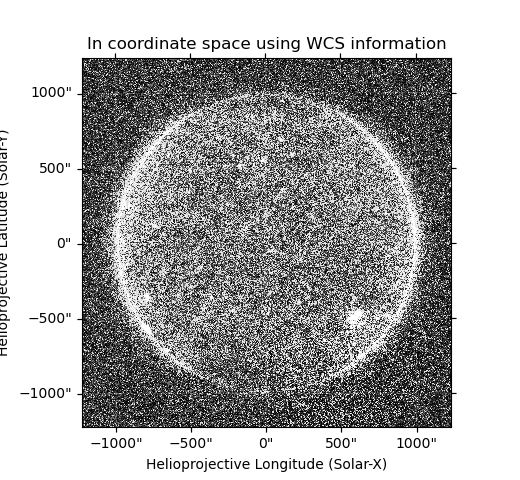
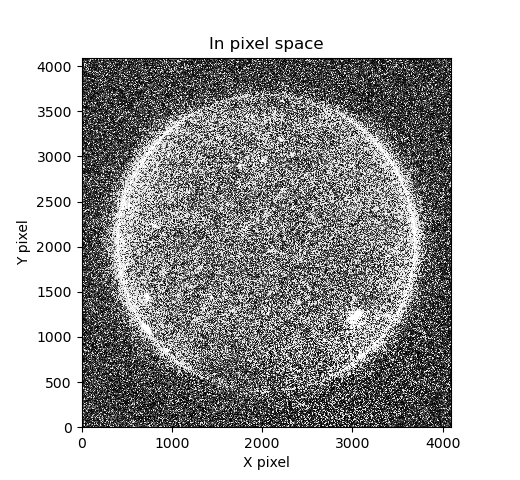
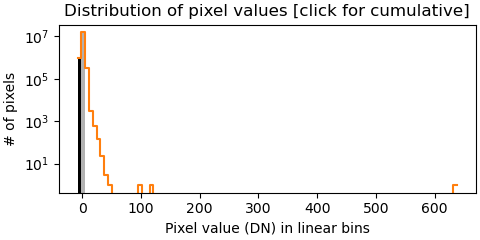
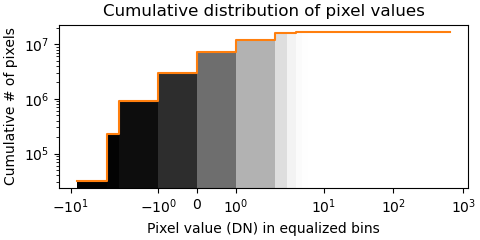

In [ ]:
Map('b.fits')

In [ ]:
result = Fido.search(
    a.Time('2020-01-01T00:00:00', '2020-01-01T00:00:05'),
    a.jsoc.Series('aia.lev1_euv_12s'),
    a.jsoc.Segment('image'),
    a.Wavelength(335*u.AA),
    a.jsoc.Notify("mgjeon@khu.ac.kr")
)

In [ ]:
result.show()

T_REC,T_OBS,WAVELNTH,DATE,FSN,EXPTIME,QUALITY,ORIGIN,TELESCOP,INSTRUME,DATE__OBS,DATE-OBS,CAMERA,IMG_TYPE,EXPSDEV,INT_TIME,WAVEUNIT,WAVE_STR,FID,QUALLEV0,TOTVALS,DATAVALS,MISSVALS,PERCENTD,DATAMIN,DATAMAX,DATAMEDN,DATAMEAN,DATARMS,DATASKEW,DATAKURT,DATACENT,DATAP01,DATAP10,DATAP25,DATAP75,DATAP90,DATAP95,DATAP98,DATAP99,NSATPIX,OSCNMEAN,OSCNRMS,FLAT_REC,NSPIKES,CTYPE1,CUNIT1,CRVAL1,CDELT1,CRPIX1,CTYPE2,CUNIT2,CRVAL2,CDELT2,CRPIX2,CROTA2,R_SUN,MPO_REC,INST_ROT,IMSCL_MP,X0_MP,Y0_MP,ASD_REC,SAT_Y0,SAT_Z0,SAT_ROT,ACS_MODE,ACS_ECLP,ACS_SUNP,ACS_SAFE,ACS_CGT,ORB_REC,DSUN_REF,DSUN_OBS,RSUN_REF,RSUN_OBS,GAEX_OBS,GAEY_OBS,GAEZ_OBS,HAEX_OBS,HAEY_OBS,HAEZ_OBS,OBS_VR,OBS_VW,OBS_VN,CAR_ROT,CRLT_OBS,CRLN_OBS,HGLN_OBS,HGLT_OBS,ROI_NWIN,CALVER32,ROI_SUM,ROI_NAX1,ROI_NAY1,ROI_LLX1,ROI_LLY1,ROI_NAX2,ROI_NAY2,ROI_LLX2,ROI_LLY2,PIXLUNIT,DN_GAIN,EFF_AREA,EFF_AR_V,TEMPCCD,TEMPGT,TEMPSMIR,TEMPFPAD,ISPSNAME,ISPPKTIM,ISPPKTVN,AIVNMST,AIMGOTS,ASQHDR,ASQTNUM,ASQFSN,AIAHFSN,AECDELAY,AIAECTI,AIASEN,AIFDBID,AIMGOTSS,AIFCPS,AIFTSWTH,AIFRMLID,AIFTSID,AIHISMXB,AIHIS192,AIHIS348,AIHIS604,AIHIS860,AIFWEN,AIMGSHCE,AECTYPE,AECMODE,AISTATE,AIAECENF,AIFILTYP,AIMSHOBC,AIMSHOBE,AIMSHOTC,AIMSHOTE,AIMSHCBC,AIMSHCBE,AIMSHCTC,AIMSHCTE,AICFGDL1,AICFGDL2,AICFGDL3,AICFGDL4,AIFOENFL,AIMGFSN,AIMGTYP,AIAWVLEN,AIAGP1,AIAGP2,AIAGP3,AIAGP4,AIAGP5,AIAGP6,AIAGP7,AIAGP8,AIAGP9,AIAGP10,AGT1SVY,AGT1SVZ,AGT2SVY,AGT2SVZ,AGT3SVY,AGT3SVZ,AGT4SVY,AGT4SVZ,AIMGSHEN,KEYWDDOC,LVL_NUM,T_REC_step,T_REC_epoch,image
str20,str23,int64,str20,int64,float64,int64,str12,str7,str5,str23,str23,int64,str5,float64,float64,str8,str8,int64,int64,int64,int64,int64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str20,int64,str8,str6,float64,float64,float64,str8,str6,float64,float64,float64,float64,float64,str30,float64,float64,float64,float64,str29,float64,float64,float64,str7,str2,str3,str2,str3,str46,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str17,str23,str7,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str2,str6,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str74,float64,float64,str23,str41
2019-12-31T23:59:59Z,2020-01-01T00:00:02.09Z,335,2020-01-07T15:05:09Z,206235995,2.900793,0,SDO/JSOC-SDP,SDO/AIA,AIA_1,2020-01-01T00:00:00.64Z,2020-01-01T00:00:00.64Z,1,LIGHT,3.6e-05,3.15625,angstrom,335_THIN,0,0,16777216,16777216,0,100.0,-8,638,0,0.5763,1.37,7.36,2820.18,0.91,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,0,--,--,aia.flatfield[:#559],18661,HPLN-TAN,arcsec,0.0,0.600737,2041.189697,HPLT-TAN,arcsec,0.0,0.600737,2038.622925,-0.142328,1624.773682,aia.master_pointing3h[:#34506],-0.142443,0.600737,2040.189697,2037.622925,sdo.lev0_asd_0004[:#78238374],-6.169498,10.465205,0.000115,SCIENCE,NO,YES,NO,GT3,sdo.fds_orbit_vectors[2020.01.01_00:00:00_UTC],149597870691.0,147081734716.42,696000000.0,976.061652,38293854.1,-10489198.9,-14207711.05,-24848793066.03,144967492063.01,-20379228.45,2275.030054,29564.409175,-5443.83188,2225,-2.94629,70.914665,0.0,-2.94629,--,--,--,--,--,--,--,--,--,--,--,DN,17.6,-0.18,3.0,-71.0,14.711,39.885,17.888,aia.lev0_isp_0011,2019-12-31T23:59:59.01Z,001.197,453,1956528038,206235995,0,206235995,206235987,1538,0,0,241,46816,20,0,3339,40962,7,0,8381190,8387519,8388608,204,2900,2,ON,CLOSED,1,0,55.096001,69.036003,41.02,26.068001,2955.947998,2969.791992,2941.803955,2926.8479,0,24,88,236,1,0,0,0,0,0,0,0,0,0,0,280,344,748,-8,-5,-11,-14,-2,1,56,122,13,https://www.lmsal.com/sdodocs/doc?cm

In [ ]:
dl_file = Fido.fetch(result)

2024-10-22 22:10:03 - drms - INFO: Export request pending. [id=JSOC_20241022_001383, status=2]
2024-10-22 22:10:03 - drms - INFO: Waiting for 0 seconds...
2024-10-22 22:10:06 - sunpy - INFO: 1 URLs found for download. Full request totaling 7MB


INFO: 1 URLs found for download. Full request totaling 7MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Observatory,SDO
Instrument,AIA 1
Detector,AIA
Measurement,335.0 Angstrom
Wavelength,335.0 Angstrom
Observation Date,2020-01-01 00:00:00
Exposure Time,2.9007929999999997 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.60073698 0.60073698] arcsec / pix
Reference Pixel,[2040.1897 2037.62292] pix

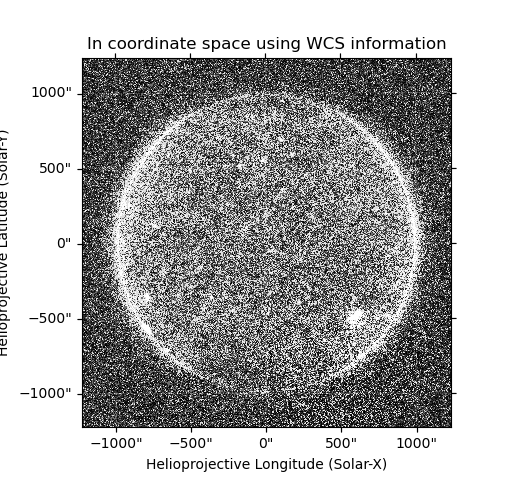
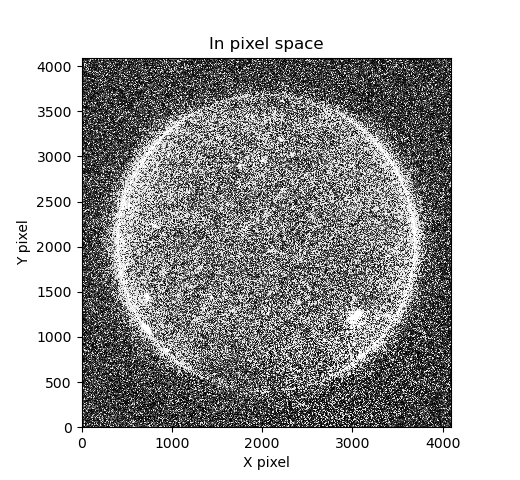
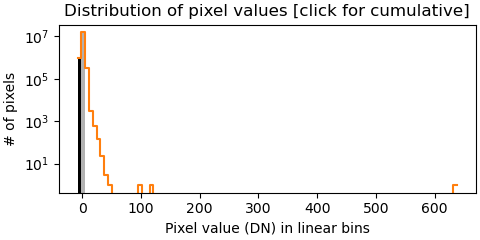
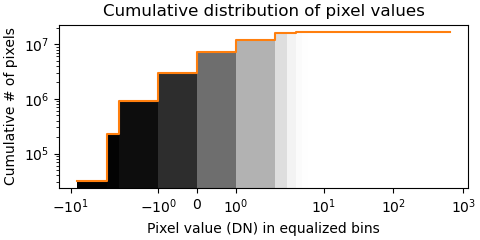

In [ ]:
Map(dl_file[0])

In [ ]:
import numpy as np

In [ ]:
np.allclose(Map('b.fits').data, Map(dl_file[0]).data)

True

### UV

In [ ]:
ds_uv = 'aia.lev1_uv_24s[%s][%s]{image}' % (time_param, ','.join(['1600', '1700']))
ds_uv

'aia.lev1_uv_24s[2020-01-01_00:00:00Z][1600,1700]{image}'

In [ ]:
keys = client.keys(ds_uv)
header, segment = client.query(ds_uv, key=','.join(keys), seg='image')

In [ ]:
header

,T_REC,T_OBS,WAVELNTH,DATE,FSN,EXPTIME,QUALITY,ORIGIN,TELESCOP,INSTRUME,...,AGT3SVY,AGT3SVZ,AGT4SVY,AGT4SVZ,AIMGSHEN,KEYWDDOC,LVL_NUM,T_REC_step,T_REC_epoch,T_REC_index
0,2019-12-31T23:59:47Z,2019-12-31T23:59:51.58Z,1600,2020-01-06T15:11:13Z,206235988,2.900738,0,SDO/JSOC-SDP,SDO/AIA,AIA_3,...,-3,0,55,121,4,https://www.lmsal.com/sdodocs/doc?cmd=dcur&pro...,1.0,24.0,1993.01.01_00:00:04_TAI,35499601


In [ ]:
t = date - timedelta(seconds=48)
t

datetime.datetime(2019, 12, 31, 23, 59, 12)

In [ ]:
t.isoformat('_', timespec='seconds')

'2019-12-31_23:59:12'

In [ ]:
(t + timedelta(seconds=96)).isoformat('_', timespec='seconds')

'2020-01-01_00:00:48'

In [ ]:
for wl in ['1600', '1700']:
    uv_ds = 'aia.lev1_uv_24s[%sZ/96s][%s]{image}' % (
                    t.replace(tzinfo=None).isoformat('_', timespec='seconds'), wl)
    uv_keys = client.keys(uv_ds)
    uv_header, uv_segment = client.query(uv_ds, key=','.join(uv_keys), seg='image')
    print(uv_header)

                  T_REC                    T_OBS  WAVELNTH  \
0  2019-12-31T23:58:59Z  2019-12-31T23:59:03.58Z      1600   
1  2019-12-31T23:59:23Z  2019-12-31T23:59:27.58Z      1600   
2  2019-12-31T23:59:47Z  2019-12-31T23:59:51.58Z      1600   
3  2020-01-01T00:00:11Z  2020-01-01T00:00:15.58Z      1600   

                   DATE        FSN   EXPTIME  QUALITY        ORIGIN TELESCOP  \
0  2020-01-06T15:11:13Z  206235956  2.900735        0  SDO/JSOC-SDP  SDO/AIA   
1  2020-01-06T15:11:13Z  206235972  2.900736        0  SDO/JSOC-SDP  SDO/AIA   
2  2020-01-06T15:11:13Z  206235988  2.900738        0  SDO/JSOC-SDP  SDO/AIA   
3  2020-01-07T15:05:20Z  206236004  2.900735        0  SDO/JSOC-SDP  SDO/AIA   

  INSTRUME  ... AGT3SVY AGT3SVZ  AGT4SVY AGT4SVZ  AIMGSHEN  \
0    AIA_3  ...       3       0       61     122         4   
1    AIA_3  ...       0       1       58     122         4   
2    AIA_3  ...      -3       0       55     121         4   
3    AIA_3  ...       2       1       60

In [ ]:
uv_header['T_REC']

0    2019-12-31T23:58:59Z
1    2019-12-31T23:59:23Z
2    2020-01-01T00:00:11Z
Name: T_REC, dtype: object

In [ ]:
date_str = uv_header['T_REC'].replace('MISSING', '').str.replace('60', '59')  # fix date format
date_diff = (pd.to_datetime(date_str).dt.tz_localize(None) - date).abs()
# sort and filter
uv_header['date_diff'] = date_diff
uv_header = uv_header.sort_values('date_diff')
uv_header['date_diff'] = date_diff
uv_header = uv_header.sort_values('date_diff')
cond_tmp = uv_header.QUALITY == 0
uv_header = uv_header[cond_tmp]
uv_header = uv_header[cond_tmp]

/tmp/ipykernel_120243/702363636.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  uv_header['date_diff'] = date_diff


In [ ]:
uv_header[['T_REC', 'date_diff']]

,T_REC,date_diff
2,2020-01-01T00:00:11Z,0 days 00:00:11
1,2019-12-31T23:59:23Z,0 days 00:00:37
0,2019-12-31T23:58:59Z,0 days 00:01:01


In [ ]:
uv_header.iloc[0]

T_REC             2020-01-01T00:00:11Z
T_OBS          2020-01-01T00:00:29.22Z
WAVELNTH                          1700
DATE              2020-01-07T15:05:20Z
FSN                          206236012
                        ...           
LVL_NUM                            1.0
T_REC_step                        24.0
T_REC_epoch    1993.01.01_00:00:04_TAI
T_REC_index                   35499602
date_diff              0 days 00:00:11
Name: 2, Length: 180, dtype: object

### HMI

In [ ]:
ds_hmi = 'hmi.M_720s[%s]{magnetogram}' % time_param
ds_hmi

'hmi.M_720s[2020-01-01_00:00:00Z]{magnetogram}'

In [ ]:
keys_hmi = client.keys(ds_hmi)
header_hmi, segment_hmi = client.query(ds_hmi, key=','.join(keys_hmi), seg='magnetogram')

In [ ]:
header_hmi

,cparms_sg000,magnetogram_bzero,magnetogram_bscale,DATE,DATE__OBS,DATE-OBS,TELESCOP,INSTRUME,WAVELNTH,CAMERA,...,ROTCOEF,ODICOEFF,OROCOEFF,POLCALM,CODEVER0,CODEVER1,CODEVER2,CODEVER3,T_REC_index,CALVER64
0,compress Rice,0,0.1,2020-01-05T23:20:55Z,2019-12-31T23:58:29.60Z,2019-12-31T23:58:29.60Z,SDO/HMI,HMI_COMBINED,6173.0,3,...,/home/jsoc/cvs/Development/JSOC/proj/lev1.5_hm...,6,4,1,"$Id: HMI_IQUV_averaging.c,v 1.57 2018/08/31 22...","$Id: interpol_code.c,v 1.6 2017/08/31 22:17:13...","$Id: interpol_code.c,v 1.6 2017/08/31 22:17:13...","$Id: polcal.c,v 1.8 2016/10/03 19:11:21 arta E...",1183320,270610


In [ ]:
np.all(len(header_hmi) != 1 or header_hmi.QUALITY != 0)

False

0    False
Name: QUALITY, dtype: bool

In [ ]:
segment_hmi

,magnetogram
0,/SUM30/D1249158085/S00003/magnetogram.fits


In [ ]:
720*2

1440

In [ ]:
t = date - timedelta(minutes=24)
t

datetime.datetime(2019, 12, 31, 23, 36)

In [ ]:
t.isoformat('_', timespec='seconds')

'2019-12-31_23:36:00'

In [ ]:
(t + timedelta(minutes=48)).isoformat('_', timespec='seconds')

'2020-01-01_00:24:00'

In [ ]:
hmi_ds = 'hmi.M_720s[%sZ/48m]{magnetogram}' % t.replace(tzinfo=None).isoformat('_', timespec='seconds')
hmi_keys = client.keys(hmi_ds)
header_hmi, segment_hmi = client.query(hmi_ds, key=','.join(keys_hmi), seg='magnetogram')

In [ ]:
header_hmi["T_REC"]

0    2019.12.31_23:36:00_TAI
1    2019.12.31_23:48:00_TAI
2    2020.01.01_00:00:00_TAI
3    2020.01.01_00:12:00_TAI
Name: T_REC, dtype: object

In [ ]:
date_str = header_hmi['T_REC'].str.replace('_TAI', '').str.replace('_', 'T')
date_str

0    2019.12.31T23:36:00
1    2019.12.31T23:48:00
2    2020.01.01T00:00:00
3    2020.01.01T00:12:00
Name: T_REC, dtype: object

In [ ]:
date_diff = (pd.to_datetime(date_str).dt.tz_localize(None) - date).abs()
# sort and filter
header_hmi['date_diff'] = date_diff
header_hmi = header_hmi.sort_values('date_diff')
segment_hmi['date_diff'] = date_diff
segment_hmi = segment_hmi.sort_values('date_diff')
cond_tmp = header_hmi.QUALITY == 0
header_hmi = header_hmi[cond_tmp]
segment_hmi = segment_hmi[cond_tmp]

In [ ]:
header_hmi[['T_REC', 'date_diff']]

,T_REC,date_diff
2,2020.01.01_00:00:00_TAI,0 days 00:00:00
1,2019.12.31_23:48:00_TAI,0 days 00:12:00
3,2020.01.01_00:12:00_TAI,0 days 00:12:00
0,2019.12.31_23:36:00_TAI,0 days 00:24:00


In [ ]:
header_hmi["WAVELNTH"]

2    6173.0
1    6173.0
3    6173.0
0    6173.0
Name: WAVELNTH, dtype: float64

In [ ]:
segment_hmi

,magnetogram,date_diff
2,/SUM30/D1249158085/S00003/magnetogram.fits,0 days 00:00:00
1,/SUM30/D1249158085/S00002/magnetogram.fits,0 days 00:12:00
3,/SUM30/D1249158085/S00004/magnetogram.fits,0 days 00:12:00
0,/SUM30/D1249158085/S00001/magnetogram.fits,0 days 00:24:00


In [ ]:
header = header_hmi.iloc[0].to_dict()

In [ ]:
segment = segment_hmi.iloc[0].magnetogram
segment

'/SUM30/D1249158085/S00003/magnetogram.fits'

In [ ]:
from urllib import request

In [ ]:
header['T_REC']

'2020.01.01_00:00:00_TAI'

In [ ]:
request.urlretrieve('http://jsoc.stanford.edu' + segment, 'a.fits')

from astropy.io import fits

header['DATE_OBS'] = header['DATE__OBS']
from sunpy.io._fits import header_to_fits
from sunpy.util import MetaDict
header = header_to_fits(MetaDict(header))
with fits.open('a.fits', 'update') as f:
    hdr = f[1].header
    for k, v in header.items():
        if pd.isna(v):
            continue
        hdr[k] = v
    f.verify('silentfix')

2024-10-22 22:13:42 - sunpy - WARNING: SunpyMetadataWarning: The meta key cparms_sg000 is too long, dropping from the FITS header (maximum allowed key length is 8 characters).
2024-10-22 22:13:42 - sunpy - WARNING: SunpyMetadataWarning: The meta key magnetogram_bzero is too long, dropping from the FITS header (maximum allowed key length is 8 characters).
2024-10-22 22:13:42 - sunpy - WARNING: SunpyMetadataWarning: The meta key magnetogram_bscale is too long, dropping from the FITS header (maximum allowed key length is 8 characters).
2024-10-22 22:13:42 - sunpy - WARNING: SunpyMetadataWarning: The meta key date__obs is too long, dropping from the FITS header (maximum allowed key length is 8 characters).
2024-10-22 22:13:42 - sunpy - WARNING: SunpyMetadataWarning: The meta key crder1 has a NaN value, which is not valid in a FITS header, dropping from the FITS header
2024-10-22 22:13:42 - sunpy - WARNING: SunpyMetadataWarning: The meta key crder2 has a NaN value, which is not valid in a F

In [ ]:
from sunpy.map import Map

Observatory,SDO
Instrument,HMI COMBINED
Detector,HMI
Measurement,magnetogram
Wavelength,6173.0
Observation Date,2019-12-31 23:58:29
Exposure Time,Unknown
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.504013 0.504013] arcsec / pix
Reference Pixel,[2041.215576 2044.104248] pix

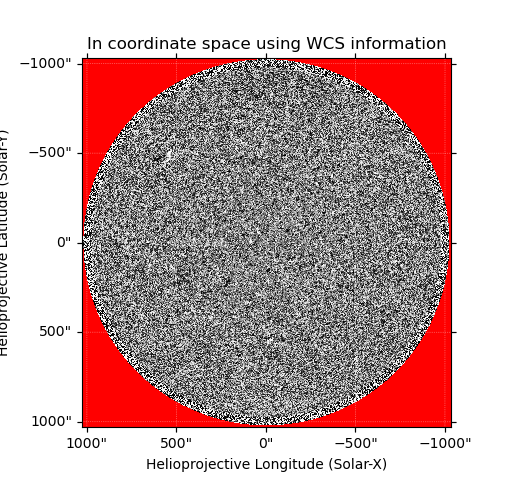
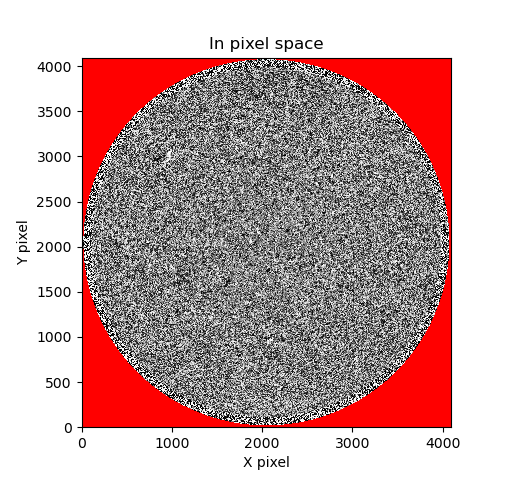
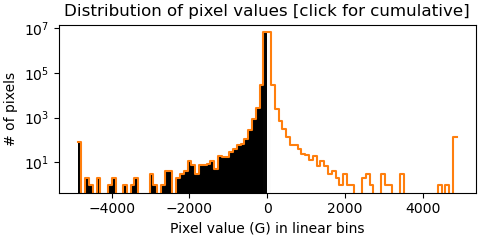
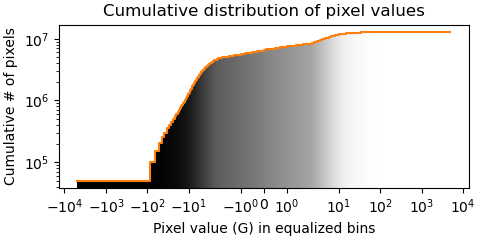

In [ ]:
Map('a.fits')

In [ ]:
res = Fido.search(
    a.Time('2020-01-01T00:00:00', '2020-01-01T00:01:00'),
    a.jsoc.Series('hmi.M_720s'),
    a.jsoc.Segment('magnetogram'),
    a.jsoc.Notify("mgjeon@khu.ac.kr")
)

In [ ]:
dl_files = Fido.fetch(res)

2024-10-22 22:06:51 - drms - INFO: Export request pending. [id=JSOC_20241022_001511, status=2]
2024-10-22 22:06:51 - drms - INFO: Waiting for 0 seconds...
2024-10-22 22:06:52 - sunpy - INFO: 1 URLs found for download. Full request totaling 14MB


INFO: 1 URLs found for download. Full request totaling 14MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [ ]:
dl_files

<parfive.results.Results object>
['/home/mgj/sunpy/data/hmi.m_720s.20200101_000000_TAI.3.magnetogram.fits']

Observatory,SDO
Instrument,HMI COMBINED
Detector,HMI
Measurement,magnetogram
Wavelength,6173.0 Angstrom
Observation Date,2019-12-31 23:58:29
Exposure Time,Unknown
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.50401294 0.50401294] arcsec / pix
Reference Pixel,[2041.21558 2044.10425] pix

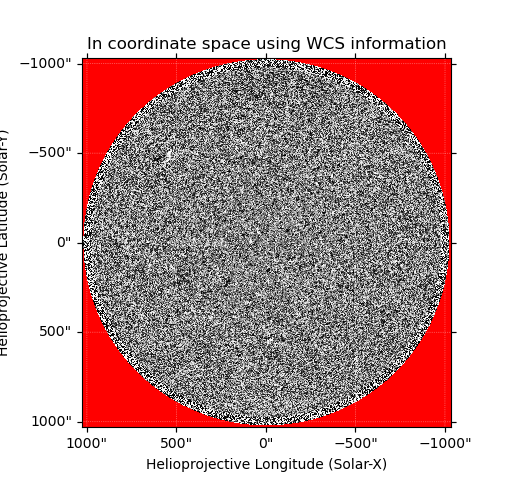
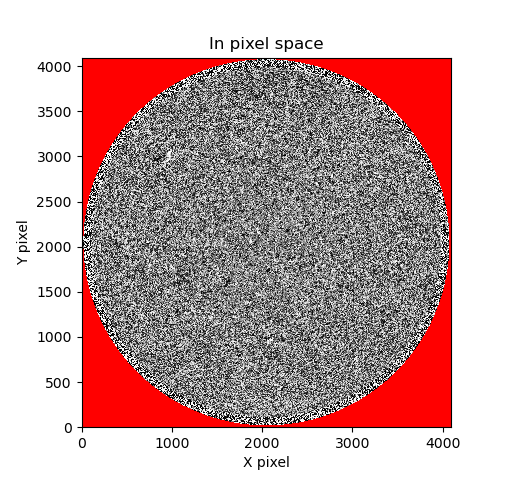
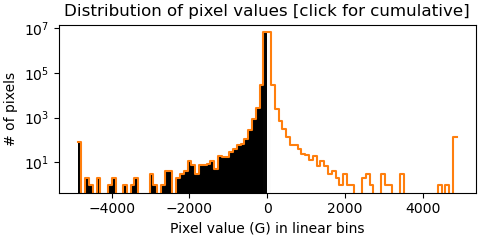
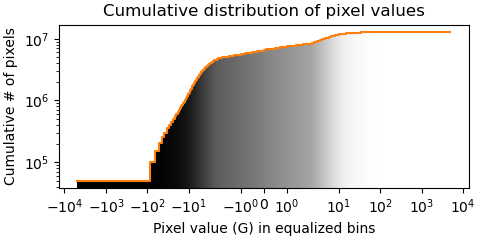

In [ ]:
Map(dl_files[0])

In [ ]:
import numpy as np

In [ ]:
np.allclose(np.nan_to_num(Map('a.fits').data), np.nan_to_num(Map(dl_files[0]).data))

True